# Импорт библиотек

In [106]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tqdm.auto import tqdm
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose

sns.set(rc={'figure.figsize':(17,5)})
sns.set(style='whitegrid');

# Загрузка данных

In [111]:
hour_online = pd.read_csv('hour_online.csv', index_col=['Time'], parse_dates=['Time'])

hour_online['hour'] = hour_online.index.hour
hour_online['year'] = hour_online.index.year
hour_online['month'] = hour_online.index.month
hour_online['week'] = hour_online.index.week    
hour_online['day_of_week'] = hour_online.index.dayofweek

print(hour_online.shape)
hour_online.head(3)

(2625, 6)


,Users,hour,year,month,week,day_of_week
Time,,,,,,
2017-01-01 00:00:00,34002,0,2017,1,52,6
2017-01-01 01:00:00,37947,1,2017,1,52,6
2017-01-01 02:00:00,41517,2,2017,1,52,6


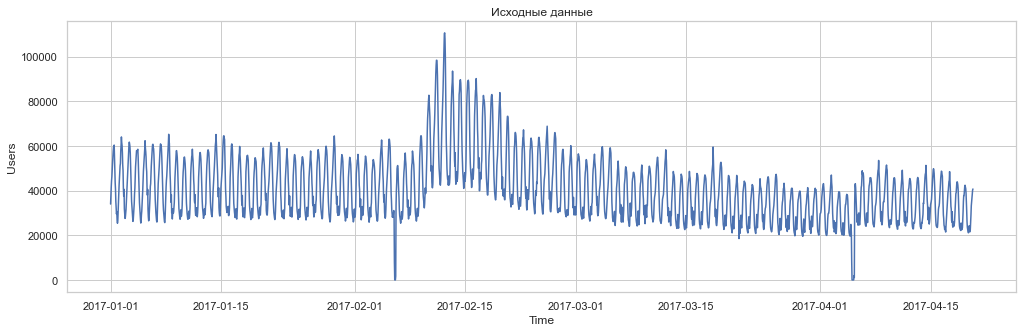

In [14]:
sns.lineplot(x=hour_online.index, y='Users', data=hour_online);
plt.title('Исходные данные');

In [112]:
airline_passengers = pd.read_csv('airline-passengers.csv', header=0, index_col=0, parse_dates=['Month'])

airline_passengers['year'] = airline_passengers.index.year
airline_passengers['month'] = airline_passengers.index.month
airline_passengers['quarter'] = airline_passengers.index.quarter

print(airline_passengers.shape)
airline_passengers.head(3)

(144, 4)


,Passengers,year,month,quarter
Month,,,,
1949-01-01,112,1949,1,1
1949-02-01,118,1949,2,1
1949-03-01,132,1949,3,1


In [16]:
fig = px.line(airline_passengers, x=airline_passengers.index, y='Passengers', height=400)
#fig.update_xaxes(dtick='M1', tickformat='%b %Y', ticklabelmode='period')
#fig.update_xaxes(dtick='M1', tickformat='%Y', ticklabelmode='period')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

# Скользящая средняя

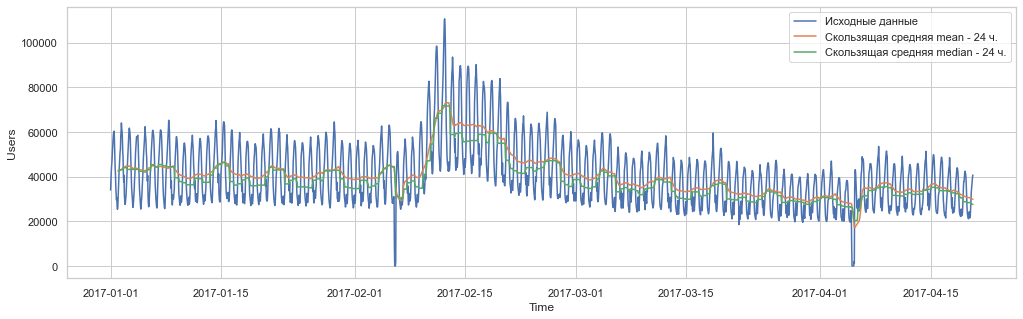

In [6]:
sns.lineplot(x=hour_online.index, y='Users', data=hour_online, label='Исходные данные');
sns.lineplot(x=hour_online.index, y='Users', data=hour_online.rolling(window=24).mean(), label='Скользящая средняя mean - 24 ч.');
sns.lineplot(x=hour_online.index, y='Users', data=hour_online.rolling(window=24).median(), label='Скользящая средняя median - 24 ч.');

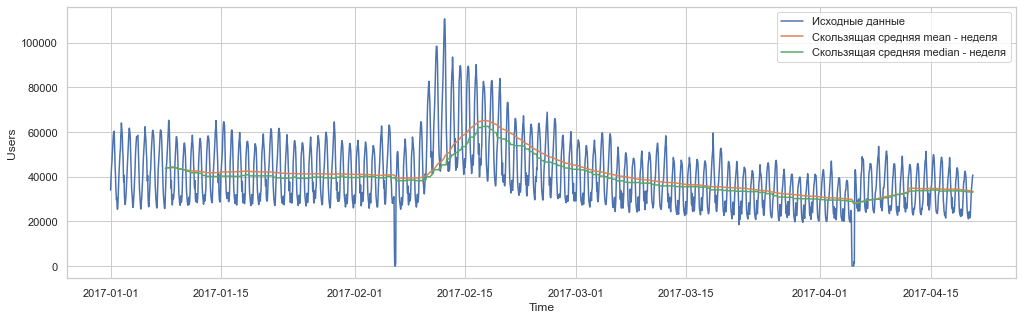

In [7]:
sns.lineplot(x=hour_online.index, y='Users', data=hour_online, label='Исходные данные');
sns.lineplot(x=hour_online.index, y='Users', data=hour_online.rolling(window=24*7).mean(), label='Скользящая средняя mean - неделя');
sns.lineplot(x=hour_online.index, y='Users', data=hour_online.rolling(window=24*7).median(), label='Скользящая средняя median - неделя');

# Декомпозиция

- Level: The average value in the series.
- Trend: The increasing or decreasing value in the series.
- Seasonality: The repeating short-term cycle in the series.
- Noise: The random variation in the series.

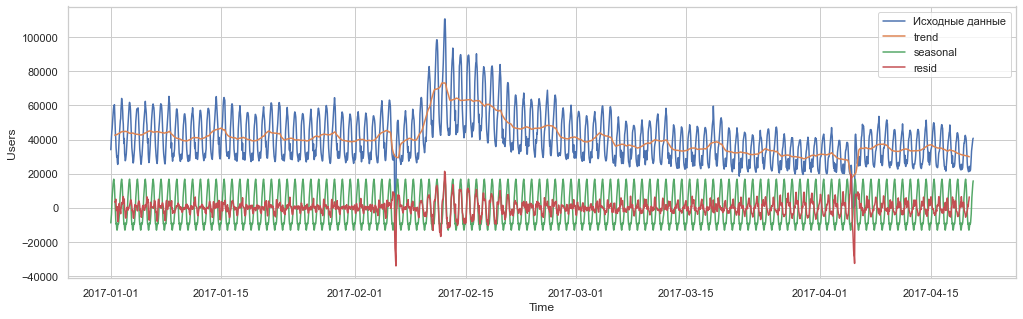

In [35]:
decomp = seasonal_decompose(hour_online['Users'], model='additive', freq=24)

data = pd.concat([hour_online, decomp.trend, decomp.seasonal, decomp.resid], axis=1)

sns.lineplot(x=data.index, y='Users', data=data, label='Исходные данные');
sns.lineplot(x=data.index, y='trend', data=data, label='trend');
sns.lineplot(x=data.index, y='seasonal', data=data, label='seasonal');
sns.lineplot(x=data.index, y='resid', data=data, label='resid');

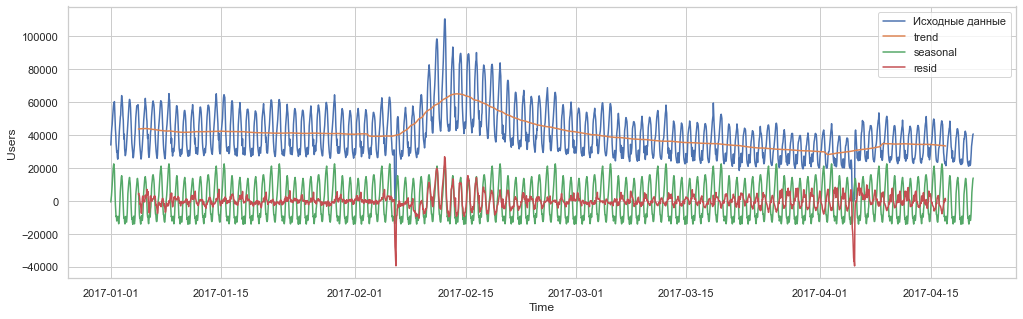

In [36]:
decomp = seasonal_decompose(hour_online['Users'], model='additive', freq=24*7)
data = pd.concat([hour_online, decomp.trend, decomp.seasonal, decomp.resid], axis=1)

sns.lineplot(x=data.index, y='Users', data=data, label='Исходные данные');
sns.lineplot(x=data.index, y='trend', data=data, label='trend');
sns.lineplot(x=data.index, y='seasonal', data=data, label='seasonal');
sns.lineplot(x=data.index, y='resid', data=data, label='resid');

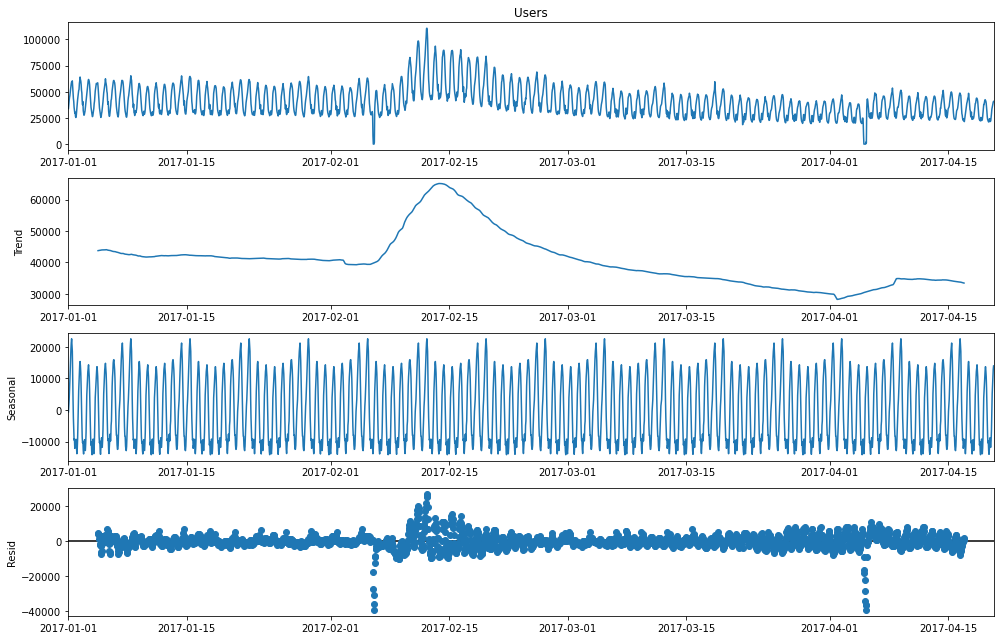

In [8]:
plt.rcParams['figure.figsize'] = (14, 9)
result = seasonal_decompose(hour_online['Users'], model='additive', freq=24*7).plot()

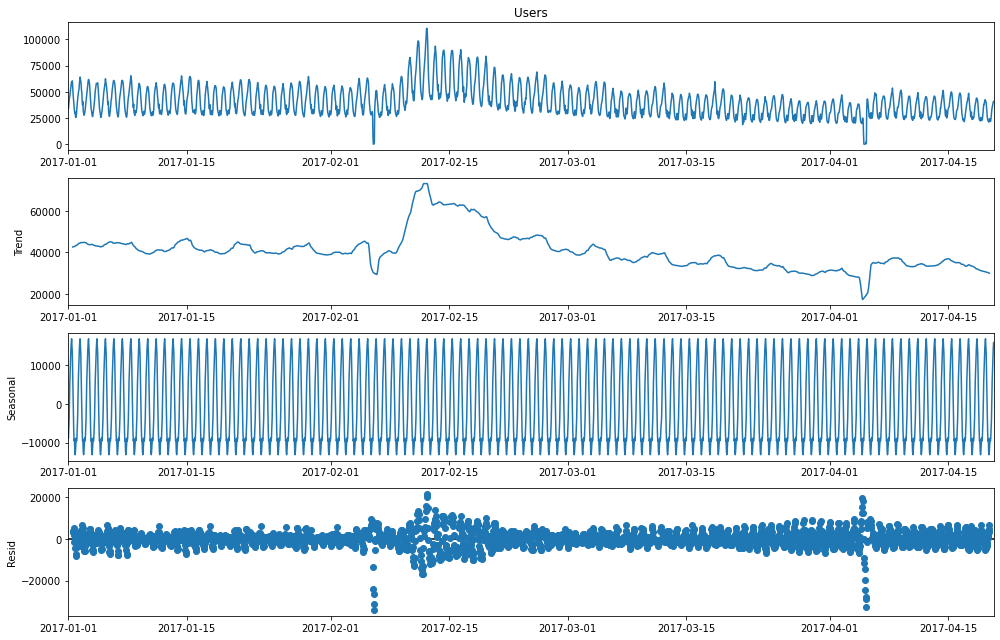

In [9]:
plt.rcParams['figure.figsize'] = (14, 9)
result = seasonal_decompose(hour_online['Users'], model='additive', freq=24).plot()

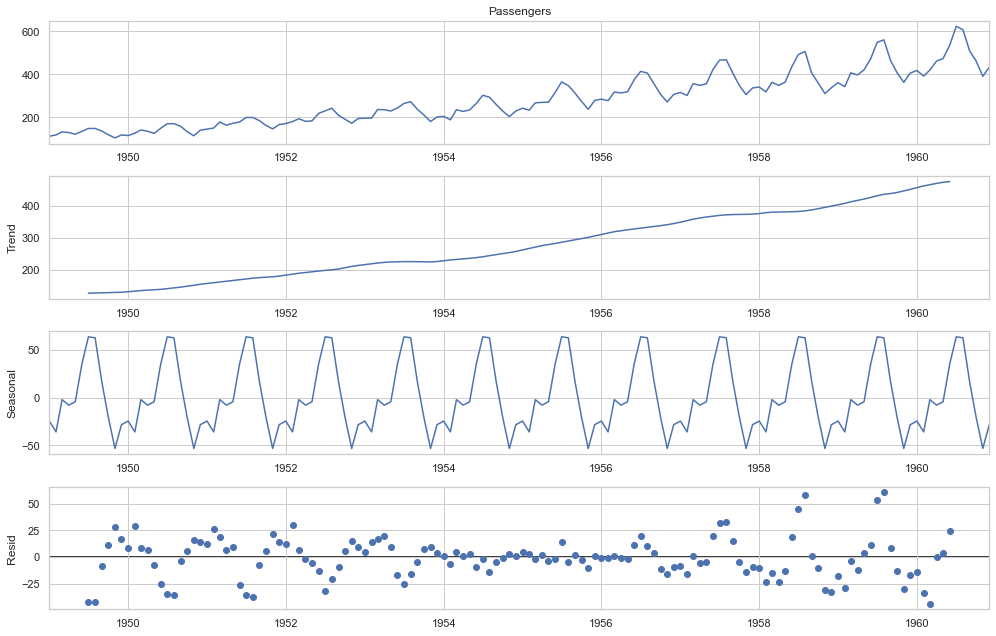

In [19]:
plt.rcParams['figure.figsize'] = (14, 9)
result = seasonal_decompose(airline_passengers['Passengers'], model='additive', freq=12).plot()

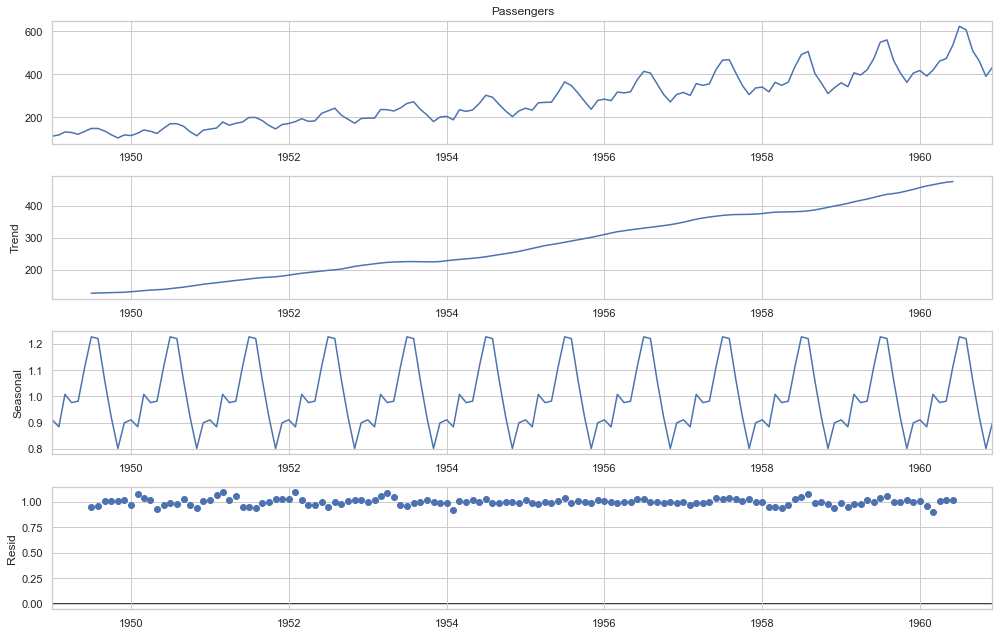

In [23]:
plt.rcParams['figure.figsize'] = (14, 9)
result = seasonal_decompose(airline_passengers['Passengers'], model='multiplicative', freq=12).plot()

## Ручная

https://towardsdatascience.com/what-is-time-series-decomposition-and-how-does-it-work-9b67e007ae90

# Коррелограмма

https://ranalytics.github.io/tsa-with-r/ch-visualisation.html

# По группам

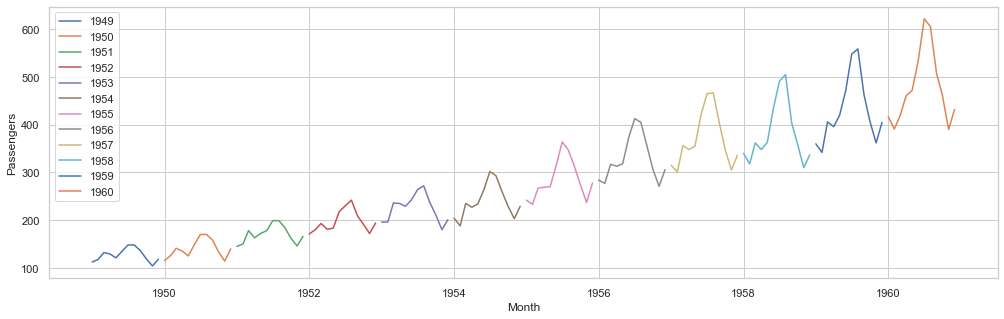

In [85]:
groups = airline_passengers['Passengers'].groupby(pd.Grouper(freq='Y'))

plt.figure(figsize=(17,5))
for name, group in groups:    
    sns.lineplot(x=group.index, y=group, label=name.year);

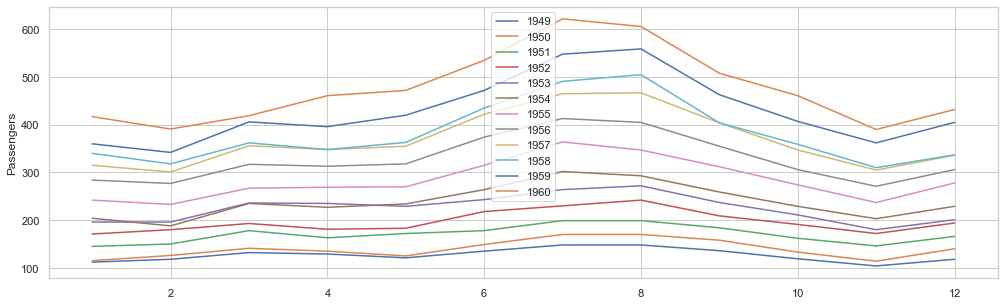

In [73]:
groups = airline_passengers['Passengers'].groupby(pd.Grouper(freq='Y'))

plt.figure(figsize=(17,5))
for name, group in groups:    
    sns.lineplot(x=range(1,len(group)+1), y=group, label=name.year);

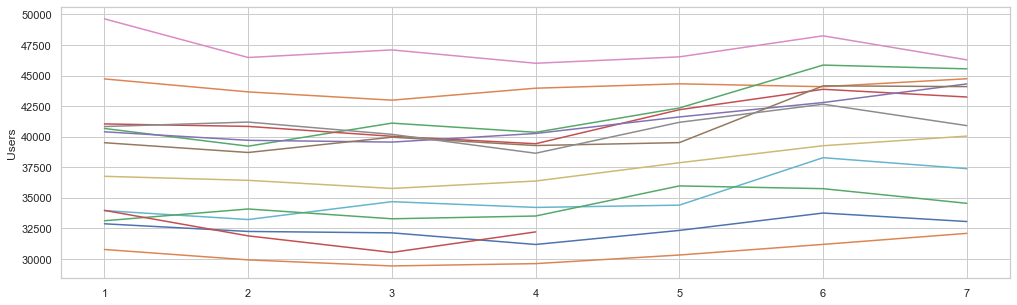

In [105]:
series = hour_online.resample('D').mean()
groups = series['Users'].groupby(pd.Grouper(freq='W'))

plt.figure(figsize=(17,5))
for name, group in groups: 
    if max(group) < 55000 and min(group) > 25000:
        sns.lineplot(x=range(1,len(group)+1), y=group);

33968.75

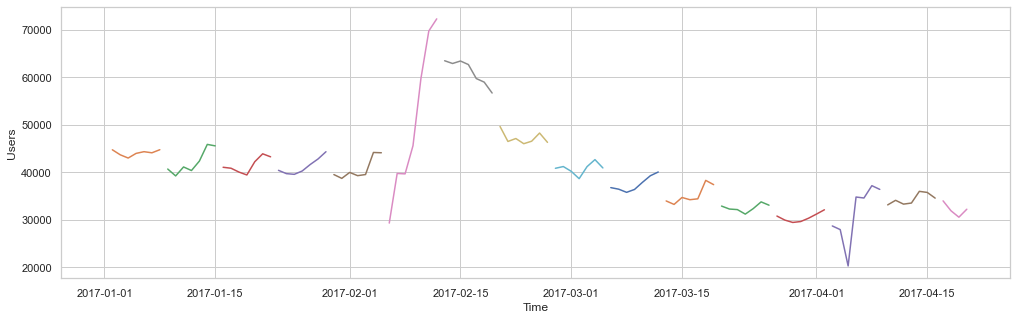

In [95]:
series = hour_online.resample('D').mean()
groups = series['Users'].groupby(pd.Grouper(freq='W'))

plt.figure(figsize=(17,5))
for name, group in groups:    
    sns.lineplot(x=group.index, y=group);

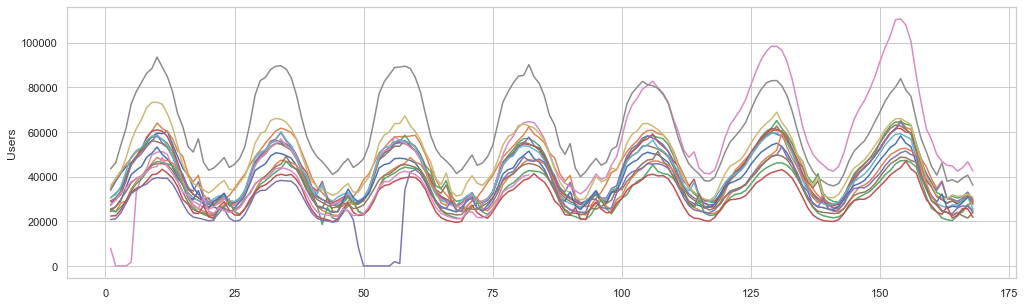

In [71]:
groups = hour_online['Users'].groupby(pd.Grouper(freq='W'))

plt.figure(figsize=(17,5))
for name, group in groups:    
    sns.lineplot(x=range(1,len(group)+1), y=group);

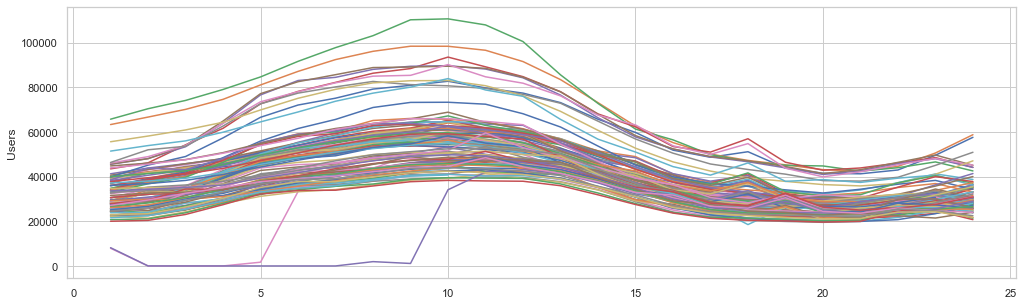

In [70]:
groups = hour_online['Users'].groupby(pd.Grouper(freq='D'))

plt.figure(figsize=(17,5))
for name, group in groups:    
    sns.lineplot(x=range(1,len(group)+1), y=group);

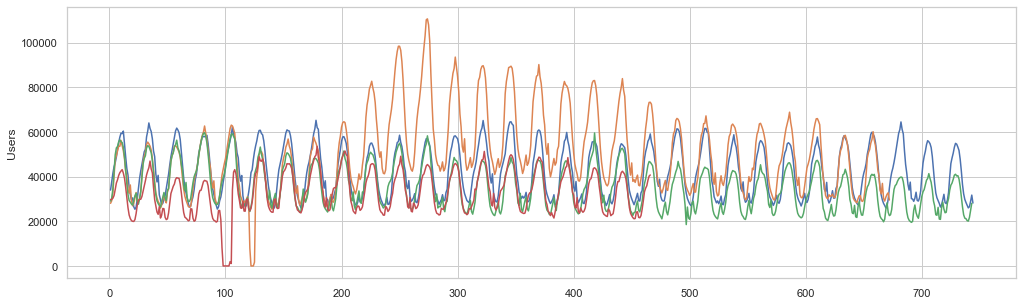

In [74]:
groups = hour_online['Users'].groupby(pd.Grouper(freq='M'))

plt.figure(figsize=(17,5))
for name, group in groups:    
    sns.lineplot(x=range(1,len(group)+1), y=group);

# Гистограмма

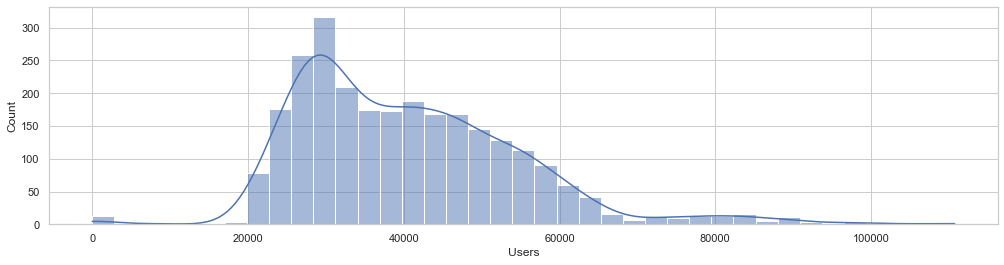

In [82]:
plt.figure(figsize=(17,4))
sns.histplot(hour_online['Users'], kde=True);

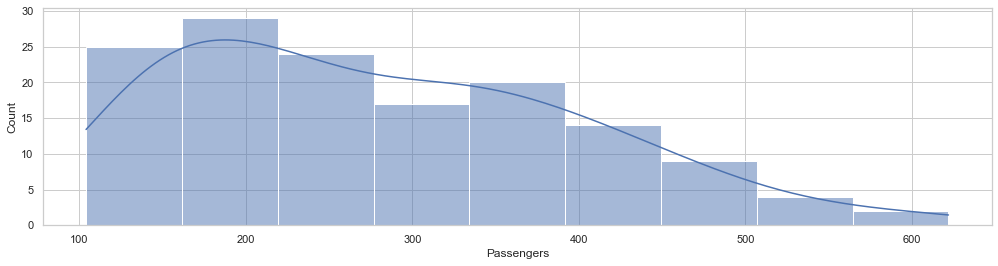

In [83]:
plt.figure(figsize=(17,4))
sns.histplot(airline_passengers['Passengers'], kde=True);

# boxplot

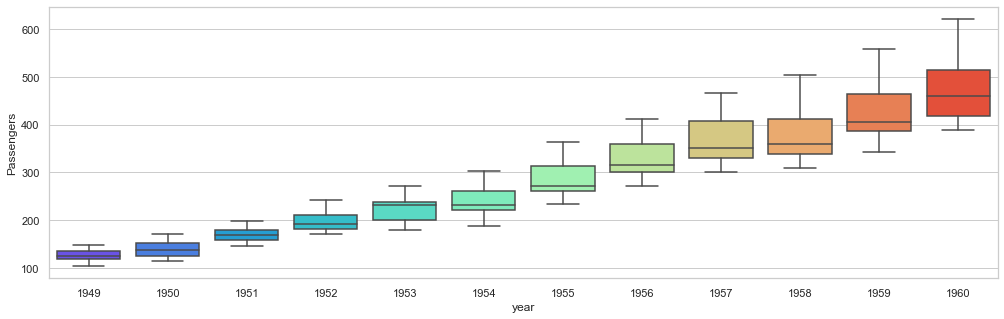

In [122]:
 sns.boxplot(x='year', y='Passengers', data=airline_passengers, palette='rainbow');

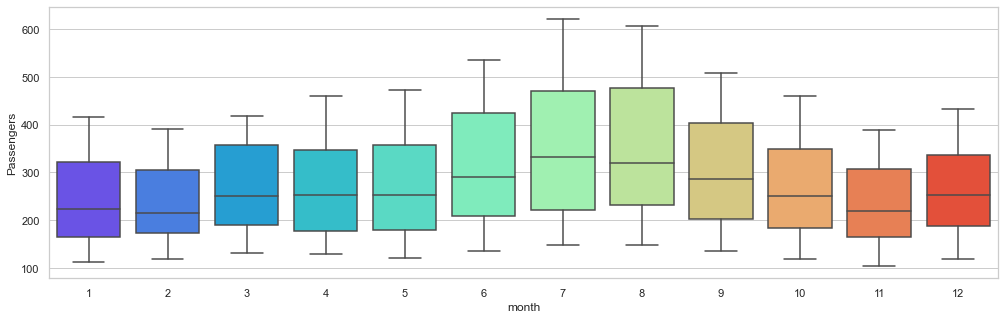

In [121]:
 sns.boxplot(x='month', y='Passengers', data=airline_passengers, palette='rainbow');

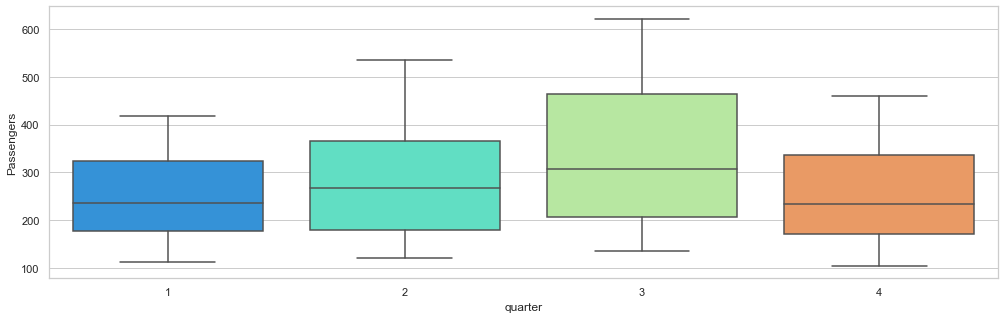

In [120]:
 sns.boxplot(x='quarter', y='Passengers', data=airline_passengers, palette='rainbow');

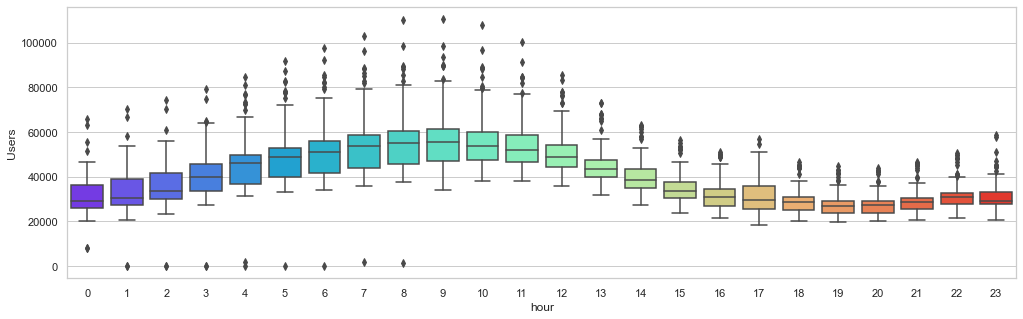

In [124]:
 sns.boxplot(x='hour', y='Users', data=hour_online, palette='rainbow');

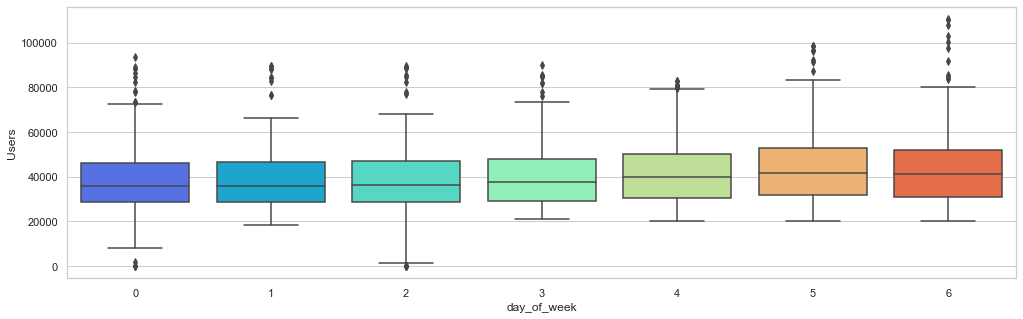

In [126]:
 sns.boxplot(x='day_of_week', y='Users', data=hour_online, palette='rainbow');

# heatmap

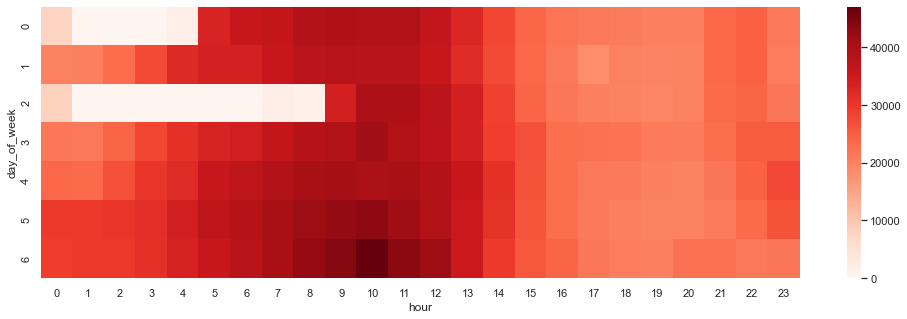

In [157]:
hm = hour_online.pivot_table(index='day_of_week', columns='hour', values='Users', aggfunc='min')
sns.heatmap(hm, cmap='Reds');

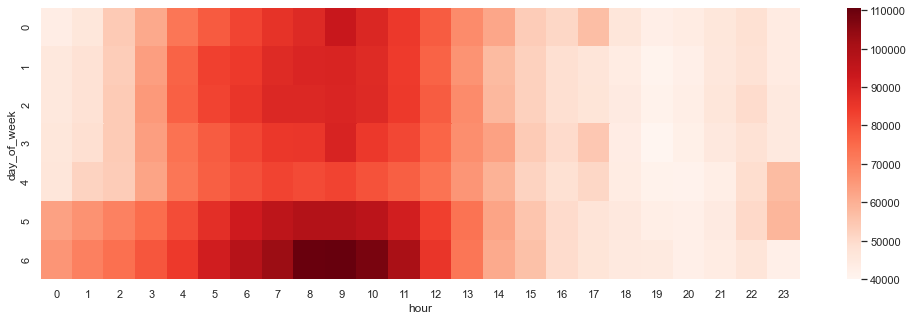

In [158]:
hm = hour_online.pivot_table(index='day_of_week', columns='hour', values='Users', aggfunc='max')
sns.heatmap(hm, cmap='Reds');

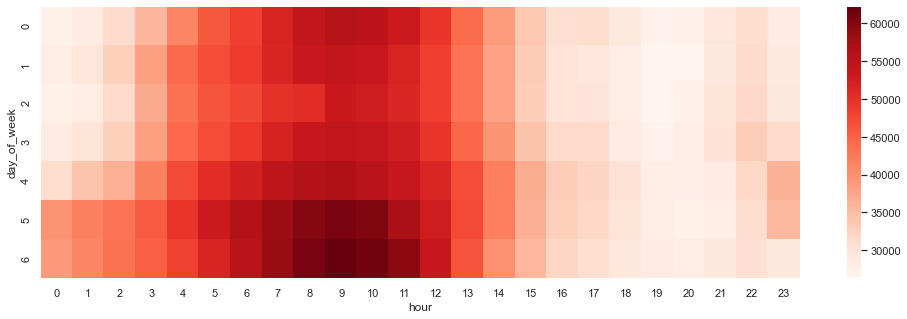

In [153]:
hm = hour_online.pivot_table(index='day_of_week', columns='hour', values='Users', aggfunc='mean')
sns.heatmap(hm, cmap='Reds');

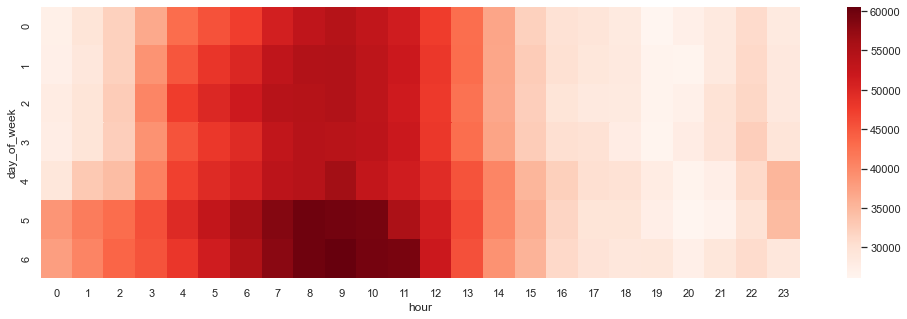

In [154]:
hm = hour_online.pivot_table(index='day_of_week', columns='hour', values='Users', aggfunc='median')
sns.heatmap(hm, cmap='Reds');

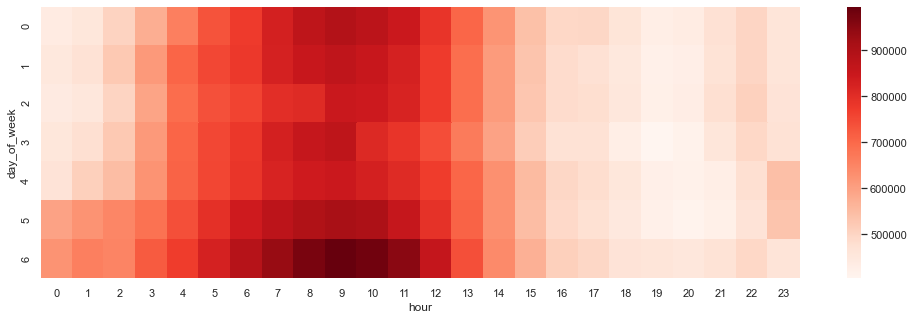

In [155]:
hm = hour_online.pivot_table(index='day_of_week', columns='hour', values='Users', aggfunc='sum')
sns.heatmap(hm, cmap='Reds');

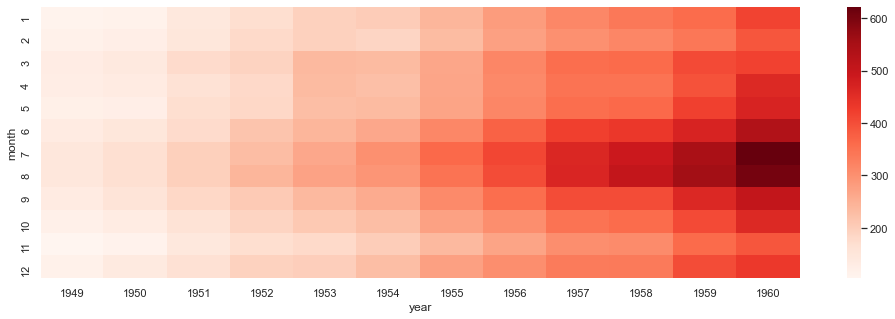

In [156]:
hm = airline_passengers.pivot_table(index='month', columns='year', values='Passengers', aggfunc='sum')
sns.heatmap(hm, cmap='Reds');

# Корреляция

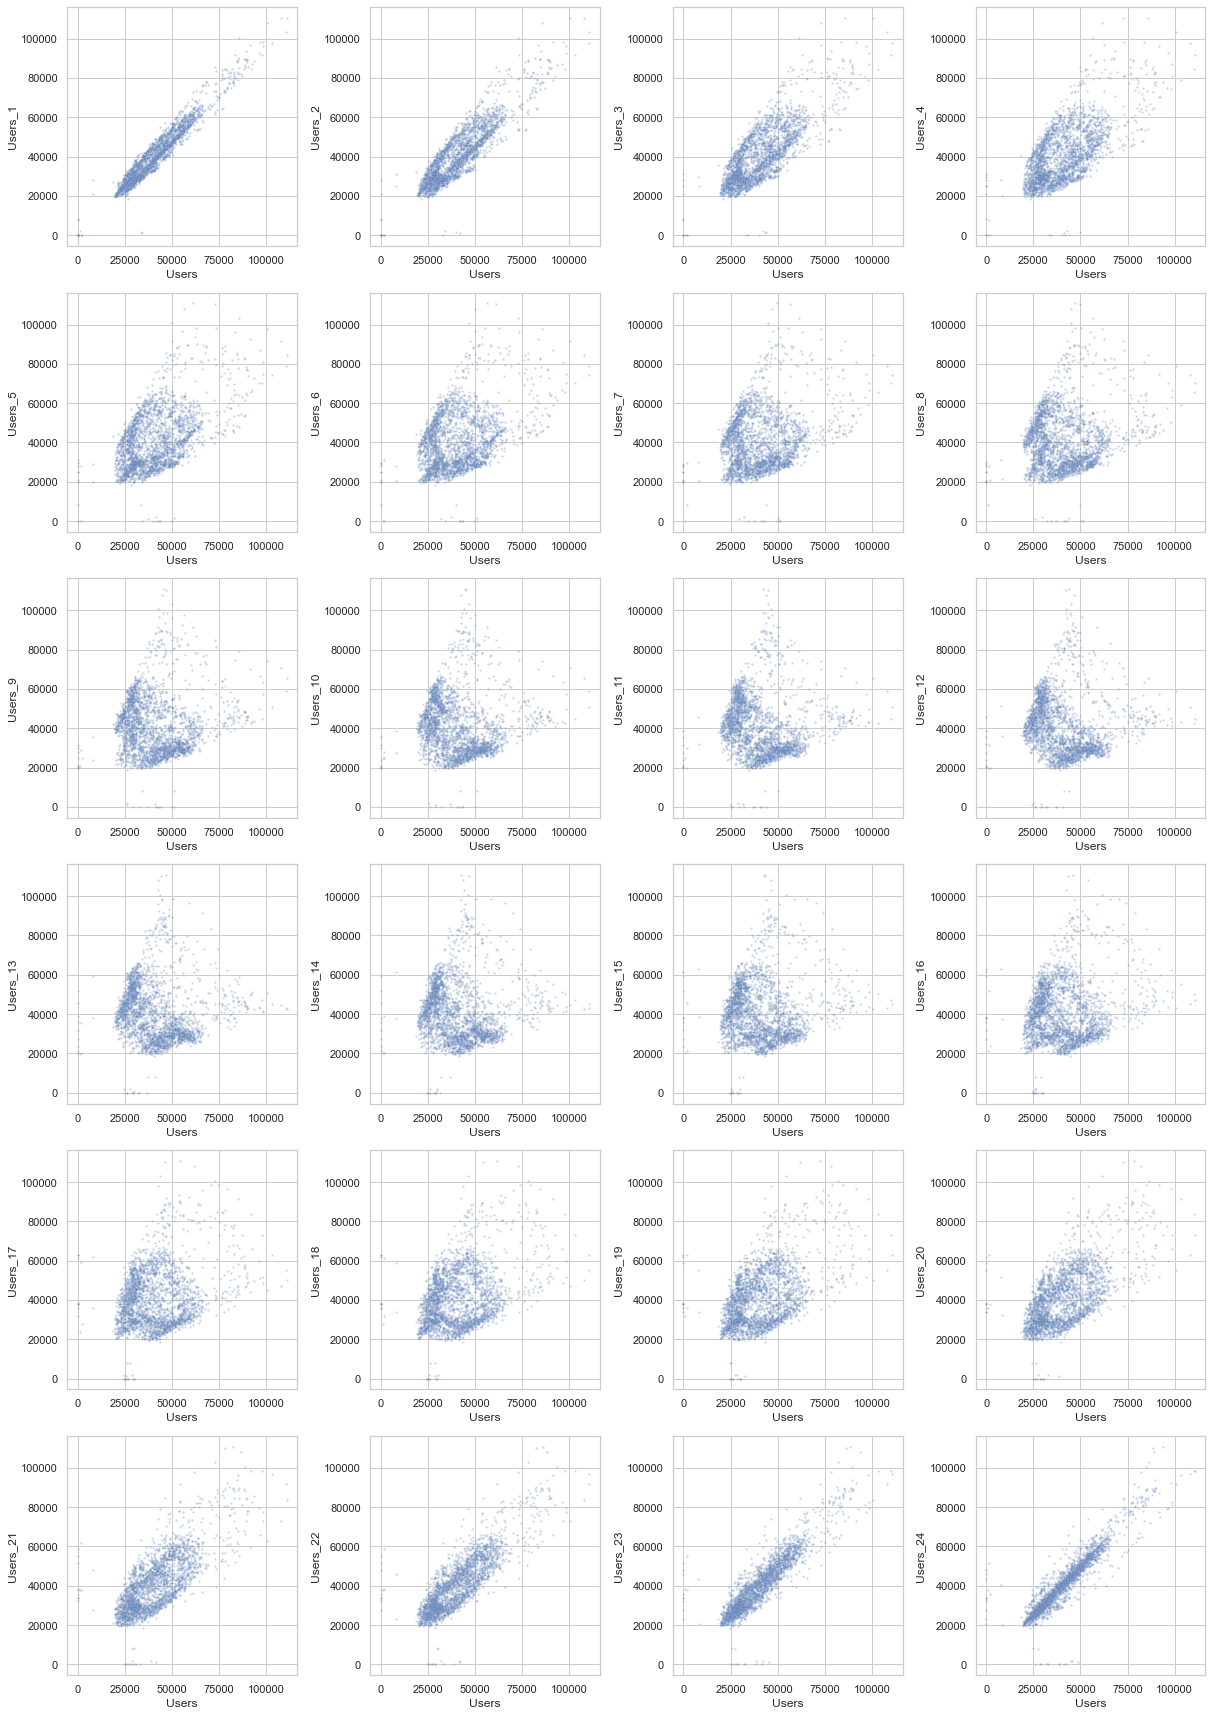

In [207]:
day_lag = hour_online[['Users']]
for l in range(1,24+1):
    day_lag[f'Users_{l}'] = hour_online['Users'].shift(l)
    
fig, axs = plt.subplots(6,4, figsize=(17,24))

l=0
for j in range(len(axs)):
    for i in range(len(axs[j])):
        l += 1
        sns.scatterplot(data=day_lag.dropna(), x='Users', y=f'Users_{l}', s=5, alpha=0.3, ax=axs[j][i])

fig.tight_layout()

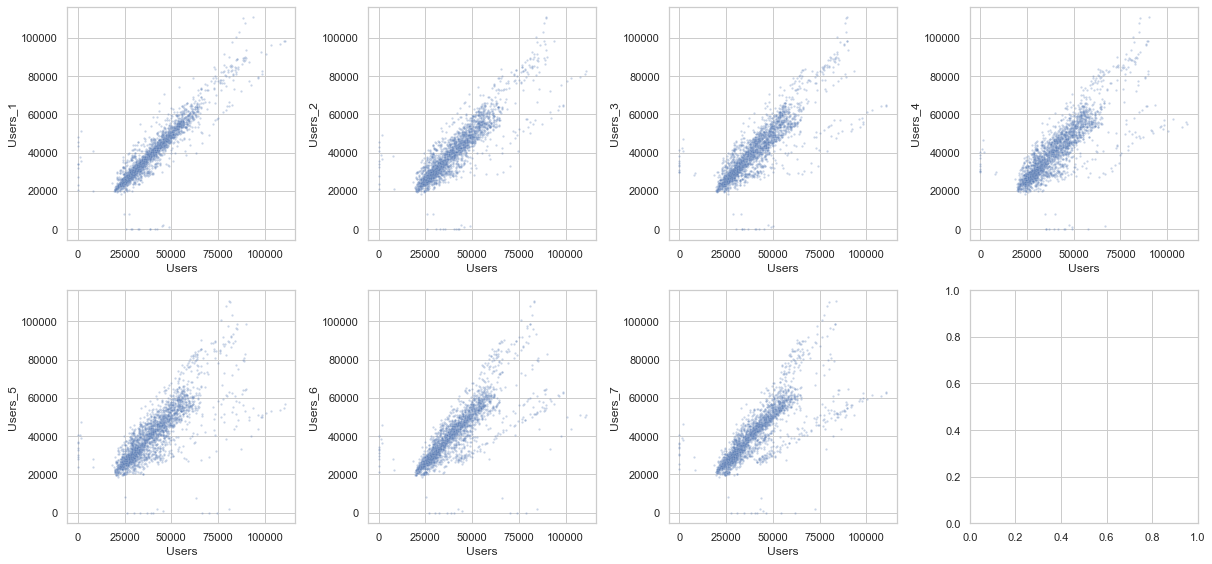

In [220]:
week_lag = hour_online[['Users']]
for l in range(1,7+1):
    week_lag[f'Users_{l}'] = hour_online['Users'].shift(l*24)
    
fig, axs = plt.subplots(2,4, figsize=(17,8))

l=0
for j in range(len(axs)):
    for i in range(len(axs[j])):
        if l > 6:
            break
        else:
            l += 1
            sns.scatterplot(data=week_lag.dropna(), x='Users', y=f'Users_{l}', s=5, alpha=0.3, ax=axs[j][i])

fig.tight_layout()